In [2]:
# credit card fraud detection
# Using a dataset of of nearly 28,500 credit card transactions we are going to identify transactions with a
# high probability of being credit card fraud

In [3]:
# let's print out the version numbers of all the libraries we will be using in this project
# it ensures we have installed the libraries 

In [6]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print("Sklearn : {}".format(sklearn.__version__))


Python: 3.6.3 |Anaconda, Inc.| (default, Oct 13 2017, 12:02:49) 
[GCC 7.2.0]
Numpy: 1.13.3
Pandas: 0.20.3
Matplotlib: 2.1.0
Seaborn: 0.8.0
Scipy: 0.19.1
Sklearn : 0.19.1


In [5]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# loading the dataset

data = pd.read_csv("creditcard.csv")

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# V1 to V28, Result of PCA dimensionality reduction python to protect sensitive information
# we also do not want to release individual identity and their location
# here in class, 0 will represent normal credit card transaction, and 1 will represent fraud
    
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [11]:
print(data.shape)

(284807, 31)


In [12]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [13]:
# taking a fraction of the whole dataset
# setting random state = 1, to obtain constant results

data = data.sample(frac = 0.1, random_state = 1)
print(data.shape)

(28481, 31)


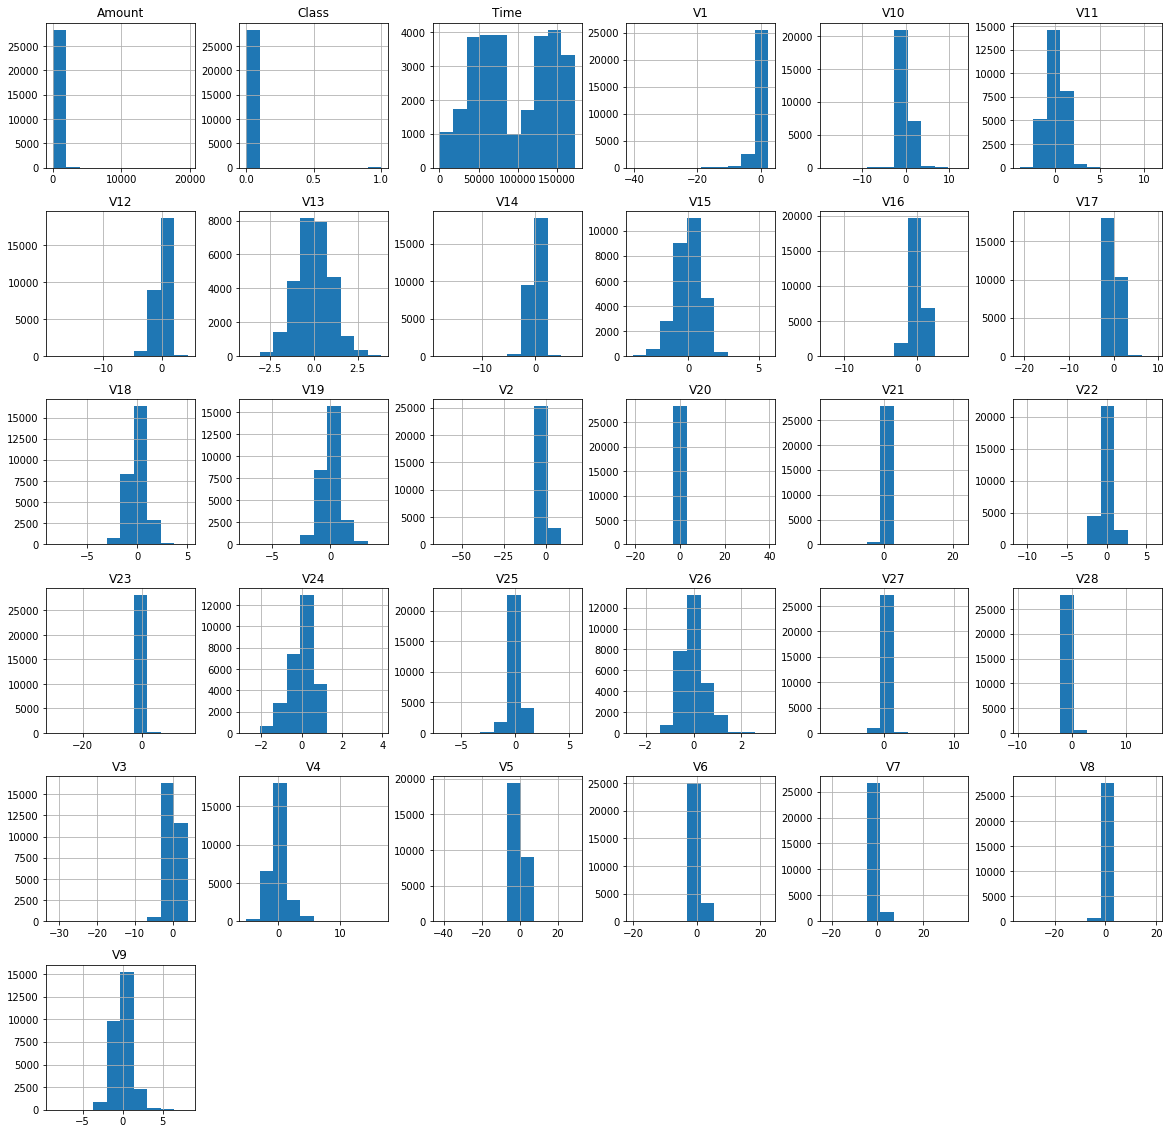

In [14]:
# plot histogram of each parameter

data.hist(figsize = (20,20))
plt.show()

In [26]:
# checking number of frauds in dataset

Fraud = data[data["Class"] ==1]
Valid = data[data["Class"] ==0]

outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)
print("Fraud Cases: {}".format(len(Fraud)))
print("Valid Cases: {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases: 49
Valid Cases: 28432


In [ ]:
# we have huge disparity between fraud and valid cases
# this might be harder to predict
# build a correlation matrix,  if there is a strong correlation btwn different variables in dataset
# if there is any linear r/s
# which features are important for classification

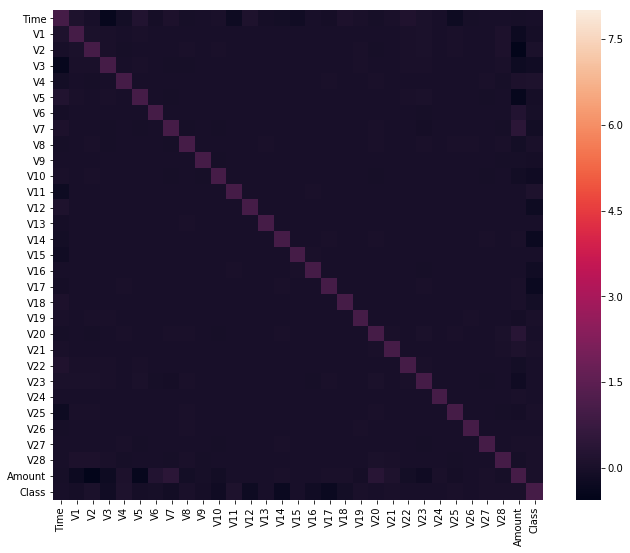

In [27]:
# corr matrix witrh heatmap
# we see most of the values are 0, i.e no correlation between v variables
# but, we care about the relation between class and v variables
# we see the variations
# lighter ones will be a positive correlation 
# darker ones will be a negative correlation 

corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat , vmax = 8, square = True)
plt.show()

In [31]:
x = data.drop("Class" , axis = 1)

target = "Class"
y = data[target]

# here we have x with 30 columns, class column has been dropped
# and y a single array with target values
print(x.shape)
print(y.shape)

(28481, 30)
(28481,)


In [ ]:
# applying algorithms
# how successful are we in outlier detection
# anomoly detection
# we can also use svm for outlier detection but because of huge dataset, it might take longer time
# hence we use IsolationForest & LocalOutlierFactor

In [32]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# LocalOutlierFactor is an is an unsupervised outlier detection method
# it measures the local anomaly score of a sample with its respective neighbours
# the score depends on the fact how isolated a sample is from its neighborhood
# isolationforest, returns anomaly score of each sample, it isolates the observations
# by randomly selecting a feature
# and then by randomly selecting a split between the max and min value of the selected feature 
# here, we will compare results of IsolationForest & LocalOutlierFactor


In [33]:
# define a random state
state = 1

In [41]:
# define the outlier detection method
# in contamination we will pass outlier fraction, i.e the number of outliers we think to be present in the data
# higher the percentage of outliers in the dataset, higher the amount of n_neighbors we want

classifiers = {
    "Isolation Forest": IsolationForest(max_samples = len(x) , contamination = outlier_fraction , random_state=state) ,
    
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20 , contamination=outlier_fraction) 
}

In [45]:
# fit the model
n_outliers = len(Fraud)

for i , (clf_name , clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
        
    else:
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x)

   

 # the results in y prediction to give us a -1 for a outlier and 1 for a in liar 
 # we can take our all in liars and classify them as 0 or valid transaction 
 # we can take our all outliers, the ones we think do not belong to the rest, can be classified as 1 or fraud transaction   
    
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != y).sum()
    
    print("{} : {}".format(clf_name , n_errors))
    print(accuracy_score(y,y_pred))
    print(classification_report(y,y_pred))

Isolation Forest : 71
0.997507110003
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.28      0.29      0.28        49

avg / total       1.00      1.00      1.00     28481

Local Outlier Factor : 97
0.996594220709
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.02      0.02      0.02        49

avg / total       1.00      1.00      1.00     28481



In [46]:
# we got 99 percent accuracy, because we had lot of valid cases
# and 30 percent precision in predicting fraudlent transactions using Isolation Forest
